In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mrwellsdavid/unsw-nb15")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'unsw-nb15' dataset.
Path to dataset files: /kaggle/input/unsw-nb15


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("chethuhn/network-intrusion-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'network-intrusion-dataset' dataset.
Path to dataset files: /kaggle/input/network-intrusion-dataset


In [ ]:
import os
import pandas as pd
import kagglehub

# Download CICIDS2017 dataset
path = kagglehub.dataset_download("chethuhn/network-intrusion-dataset")
print("Dataset directory:", path)

# Example: Load one file (e.g., DDos attack dataset)
csv_file = os.path.join(path, "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
unsw_df = pd.read_csv(csv_file)

print("Loaded file:", csv_file)
print("Columns:", list(unsw_df.columns)[:20])
print("Shape:", unsw_df.shape)


Using Colab cache for faster access to the 'network-intrusion-dataset' dataset.
Dataset directory: /kaggle/input/network-intrusion-dataset
Loaded file: /kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Columns: [' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min']
Shape: (225745, 79)


In [ ]:
import kagglehub
import pandas as pd
import os
import glob

# Download UNSW-NB15 dataset
path = kagglehub.dataset_download("mrwellsdavid/unsw-nb15")
print("Dataset directory:", path)

# The UNSW-NB15 dataset consists of multiple CSV files
# Load all CSV files into a single DataFrame
all_files = glob.glob(os.path.join(path, "*.csv"))

unsw_dfs = []
for f in all_files:
    # Try reading with a different encoding and low_memory=False
    df = pd.read_csv(f, encoding='latin1', low_memory=False)
    unsw_dfs.append(df)

unsw_df_raw = pd.concat(unsw_dfs, ignore_index=True)

# Select the required columns
unsw = unsw_df_raw[['dur', 'proto', 'service', 'state',
                'spkts', 'dpkts', 'sbytes', 'dbytes',
                'rate', 'sttl', 'dttl', 'sload', 'dload',
                'sinpkt', 'dinpkt', 'sjit', 'djit',
                'attack_cat', 'label']].copy()

print("Loaded UNSW-NB15 dataset shape:", unsw.shape)
print("Columns:", list(unsw.columns))

Using Colab cache for faster access to the 'unsw-nb15' dataset.
Dataset directory: /kaggle/input/unsw-nb15
Loaded UNSW-NB15 dataset shape: (2797973, 19)
Columns: ['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'attack_cat', 'label']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode protocol, service, state, attack_cat
for col in ['proto', 'service', 'state', 'attack_cat']:
    unsw[col] = LabelEncoder().fit_transform(unsw[col].astype(str))

# Normalize numeric columns (optional for neural models)
num_cols = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes',
            'rate', 'sttl', 'dttl', 'sload', 'dload',
            'sinpkt', 'dinpkt', 'sjit', 'djit']
unsw[num_cols] = unsw[num_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [ ]:
import pandas as pd
import glob
import os # Import os module

# Use the path where the dataset was downloaded in Colab
path = "/kaggle/input/network-intrusion-dataset"
all_files = glob.glob(os.path.join(path, "*.csv"))

cic_dfs = []
for f in all_files:
    df = pd.read_csv(f)
    cic_dfs.append(df)

cic = pd.concat(cic_dfs, ignore_index=True)
print(cic.shape)

(2830743, 79)


In [ ]:
cic.columns
# Typical relevant features:
# ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
#  'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Protocol', 'Label']


Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [ ]:
# Strip spaces from columns
cic.columns = cic.columns.str.strip()

# Columns to keep
keep_cols = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
             'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
             'Label']

# Keep only required columns
combined = cic[keep_cols].copy()

# Rename columns to match UNSW style (optional)
combined.rename(columns={
    'Flow Duration':'dur',
    'Total Fwd Packets':'spkts',
    'Total Backward Packets':'dpkts',
    'Total Length of Fwd Packets':'sbytes',
    'Total Length of Bwd Packets':'dbytes',
    'Protocol':'proto',
    'Label':'attack_cat'
}, inplace=True)


In [ ]:
# Attack label encoding (0=normal, 1=attack)
combined['attack_cat'] = combined['attack_cat'].apply(lambda x: 0 if str(x).lower()=='benign' else 1)

# Normalize numeric features
num_cols = ['dur','spkts','dpkts','sbytes','dbytes']
combined[num_cols] = combined[num_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [ ]:
# Example columns after preprocessing
# ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'attack_cat']

unsw_cols = unsw_df.columns.tolist()
cic_cols = combined.columns.tolist()

print("UNSW columns:", unsw_cols)
print("CIC columns:", cic_cols)

UNSW columns: [' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count

In [ ]:
common_cols = ['dur','spkts','dpkts','sbytes','dbytes','attack_cat']

In [ ]:
unsw_common = unsw[common_cols].copy()
cic_common = combined[common_cols].copy()

In [ ]:
import pandas as pd

combined_df = pd.concat([unsw_common, cic_common], ignore_index=True)
print("Combined dataset shape:", combined_df.shape)

Combined dataset shape: (5628716, 6)


In [ ]:
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
print(combined_df['attack_cat'].value_counts())

attack_cat
10    2540300
0     2275774
1      559975
6       93000
5       58871
3       44525
4       24246
2       16353
7       13987
8        1511
9         174
Name: count, dtype: int64


In [ ]:
import pandas as pd

df = combined_df.copy()

# Keep original attack_cat for reference
df['orig_attack_cat'] = df['attack_cat']

# Function to convert mixed labels to binary
def to_binary_label(x):
    if pd.isna(x):
        return 1  # treat unknown as attack
    s = str(x).strip().lower()
    if s in ('0', 'normal', 'benign'):
        return 0
    else:
        return 1

# Create binary label column
df['label'] = df['attack_cat'].apply(to_binary_label)

# Verify
print("Binary label distribution:")
print(df['label'].value_counts())

Binary label distribution:
label
1    3352942
0    2275774
Name: count, dtype: int64


In [ ]:
import networkx as nx

G = nx.Graph()

# Sample a smaller subset if you want to visualize easily
df_sample = df.sample(n=5000, random_state=42)  # optional for visualization

for idx, row in df_sample.iterrows():
    src = f"src_{idx}"  # or use proto/spkts combinations
    dst = f"dst_{idx}"

    features = row[['dur','spkts','dpkts','sbytes','dbytes']].values
    label = int(row['label'])

    G.add_node(src)
    G.add_node(dst)
    G.add_edge(src, dst, features=features, label=label)

try:
    print(nx.info(G))
except AttributeError:
    # fallback for NetworkX v3
    print(f"Graph: {type(G)}")
    print(f"Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")

Graph: <class 'networkx.classes.graph.Graph'>
Nodes: 10000, Edges: 5000


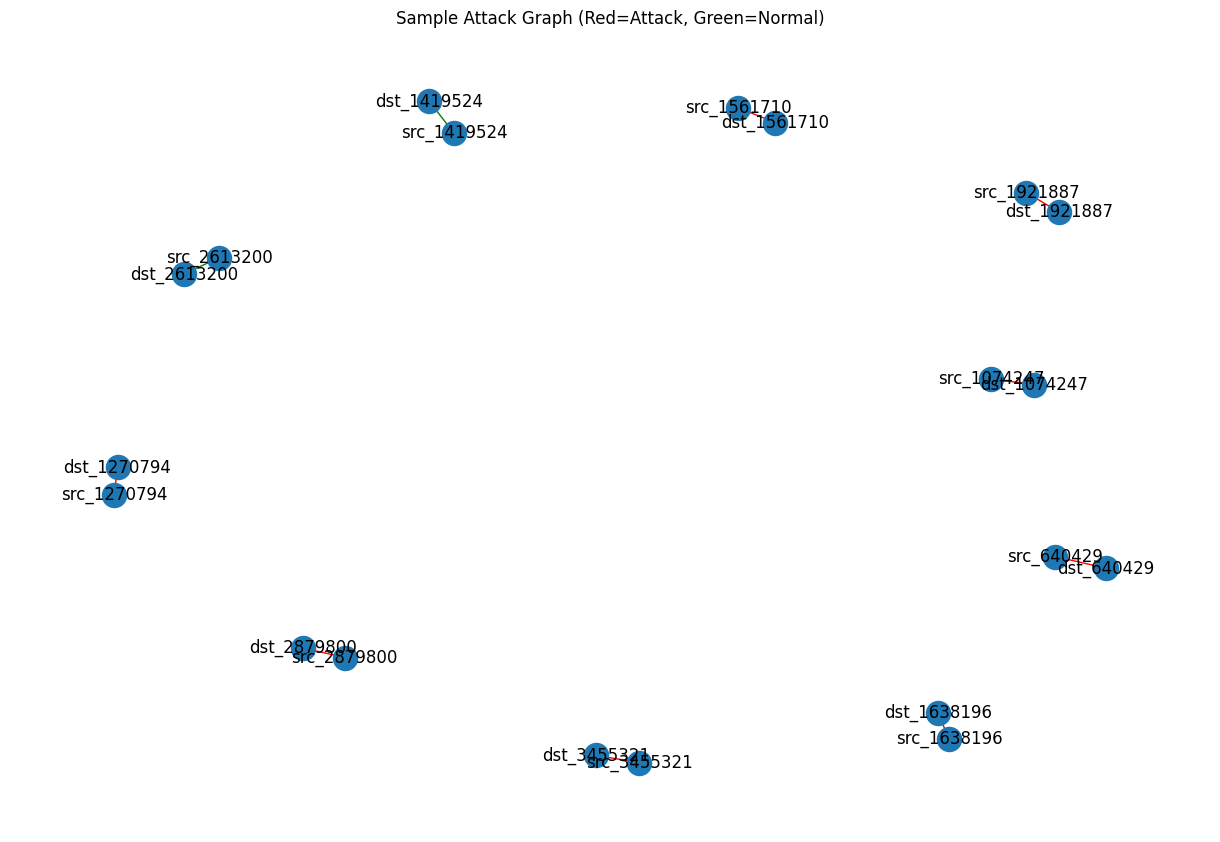

In [ ]:
import matplotlib.pyplot as plt
H = nx.Graph()
H.add_edges_from(list(G.edges(data=True))[:10])

edge_colors = ['red' if d['label']==1 else 'green' for u,v,d in H.edges(data=True)]
pos = nx.spring_layout(H, seed=42)

plt.figure(figsize=(12,8))
nx.draw(H, pos, with_labels=True, node_size=300, edge_color=edge_colors)
plt.title("Sample Attack Graph (Red=Attack, Green=Normal)")
plt.show()

In [ ]:
df.head()

,dur,spkts,dpkts,sbytes,dbytes,attack_cat,orig_attack_cat,label
0,NaN,NaN,NaN,NaN,NaN,10,10,1
1,NaN,NaN,NaN,NaN,NaN,10,10,1
2,NaN,NaN,NaN,NaN,NaN,10,10,1
3,0.000006,0.0,0.000003,0.0,0.0,0,0,0
4,NaN,NaN,NaN,NaN,NaN,10,10,1


In [ ]:
!pip install torch_geometric

import torch
from torch_geometric.data import Data
import numpy as np

# Map nodes to integer IDs
node_mapping = {node: i for i, node in enumerate(G.nodes())}
num_nodes = len(node_mapping)

# Build cleaned edge feature/label lists
kept_edges = []
feat_list = []
label_list = []
feat_dim = None

for u, v in G.edges():
    raw_feat = G[u][v].get('features', None)
    raw_lbl = G[u][v].get('label', None)
    if raw_feat is None:
        continue

    arr = np.array(raw_feat, dtype=np.float32).reshape(-1)
    arr = np.nan_to_num(arr, nan=0.0, posinf=0.0, neginf=0.0)

    if feat_dim is None:
        feat_dim = arr.shape[0]
    if arr.shape[0] != feat_dim:
        # skip edges with inconsistent feature length
        continue

    feat_list.append(arr)
    try:
        label_list.append(int(raw_lbl))
    except Exception:
        # fallback: non-numeric labels treated as attack if not benign/normal/0
        s = str(raw_lbl).strip().lower()
        label_list.append(0 if s in ("0","benign","normal") else 1)

    kept_edges.append((node_mapping[u], node_mapping[v]))

if len(feat_list) == 0:
    raise ValueError("No valid edges after cleaning. Check your feature construction.")

# Convert to tensors
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
edge_attr = torch.tensor(np.stack(feat_list, axis=0), dtype=torch.float32, device=device)
edge_labels = torch.tensor(label_list, dtype=torch.long, device=device)
edge_index = torch.tensor(kept_edges, dtype=torch.long, device=device).t().contiguous()

# Build node features as sum of connected edge features
node_features = torch.zeros((num_nodes, edge_attr.shape[1]), dtype=torch.float32, device=device)
for i, (u, v) in enumerate(kept_edges):
    node_features[u] += edge_attr[i]
    node_features[v] += edge_attr[i]

# Normalize node features safely
norm = node_features.norm(dim=1, keepdim=True)
node_features = node_features / (norm + 1e-8)

# PyG Data
data = Data(x=node_features, edge_index=edge_index, y=edge_labels, edge_attr=edge_attr).to(device)
print("✅ PyG Data ready:", data)
print(f"Nodes: {data.num_nodes}, Edges: {data.num_edges}, Edge feat dim: {edge_attr.size(1)}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.7 MB/s eta 0:00:00
✅ PyG Data ready: Data(x=[10000, 5], edge_index=[2, 5000], edge_attr=[5000, 5], y=[5000])
Nodes: 10000, Edges: 5000, Edge feat dim: 5


In [ ]:
import torch
from torch_geometric.data import Data
import numpy as np

# Map nodes to integer IDs
node_mapping = {node: i for i, node in enumerate(G.nodes())}
num_nodes = len(node_mapping)

# Edge lists and features
edge_u_list = [node_mapping[u] for u, v in G.edges()]
edge_v_list = [node_mapping[v] for u, v in G.edges()]
edges = list(zip(edge_u_list, edge_v_list))

# Clean + ensure numeric edge features
edge_features = []
edge_labels = []

for u, v in G.edges():
    feat = np.array(G[u][v]['features'], dtype=np.float32).flatten()
    edge_features.append(feat)
    edge_labels.append(int(G[u][v]['label']))

# Convert to consistent NumPy array
edge_features = np.stack(edge_features, axis=0).astype(np.float32)
edge_features = torch.tensor(edge_features, dtype=torch.float)
edge_labels = torch.tensor(edge_labels, dtype=torch.long)

# Build edge_index
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

# Build node features as sum of connected edge features
node_features = torch.zeros((num_nodes, edge_features.shape[1]))
for i, (u, v) in enumerate(edges):
    node_features[u] += edge_features[i]
    node_features[v] += edge_features[i]

# Normalize node features safely (avoid NaN)
norm = node_features.norm(dim=1, keepdim=True)
node_features = node_features / (norm + 1e-8)

# Build PyG Data object
data = Data(x=node_features, edge_index=edge_index, y=edge_labels, edge_attr=edge_features)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = data.to(device)

print("✅ PyG Data ready:")
print(data)

✅ PyG Data ready:
Data(x=[10000, 5], edge_index=[2, 5000], edge_attr=[5000, 5], y=[5000])


In [ ]:
import torch.nn as nn

# Compute class weights
counts = torch.bincount(edge_labels)
weights = torch.tensor([1.0 / counts[0], 1.0 / counts[1]], dtype=torch.float).to(device)

criterion = nn.CrossEntropyLoss(weight=weights)


In [ ]:
import torch.nn.functional as F
from torch_geometric.nn import NNConv

class EdgeGNN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        nn1 = nn.Sequential(
            nn.Linear(in_channels, hidden_channels),
            nn.ReLU(),
            nn.Linear(hidden_channels, in_channels * hidden_channels)
        )
        self.conv1 = NNConv(in_channels, hidden_channels, nn1, aggr='mean')
        self.lin = nn.Linear(hidden_channels, out_channels)

    def forward(self, x, edge_index, edge_attr):
        x = self.conv1(x, edge_index, edge_attr)
        x = F.relu(x)
        x = self.lin(x)
        # predict per edge
        return x[edge_index[0]]


In [ ]:
import torch.optim as optim

model = EdgeGNN(in_channels=data.edge_attr.shape[1], hidden_channels=64, out_channels=2).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.05)
epochs = 40

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index, data.edge_attr)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 1/40, Loss: nan
Epoch 2/40, Loss: nan
Epoch 3/40, Loss: nan
Epoch 4/40, Loss: nan
Epoch 5/40, Loss: nan
Epoch 6/40, Loss: nan
Epoch 7/40, Loss: nan
Epoch 8/40, Loss: nan
Epoch 9/40, Loss: nan
Epoch 10/40, Loss: nan
Epoch 11/40, Loss: nan
Epoch 12/40, Loss: nan
Epoch 13/40, Loss: nan
Epoch 14/40, Loss: nan
Epoch 15/40, Loss: nan
Epoch 16/40, Loss: nan
Epoch 17/40, Loss: nan
Epoch 18/40, Loss: nan
Epoch 19/40, Loss: nan
Epoch 20/40, Loss: nan
Epoch 21/40, Loss: nan
Epoch 22/40, Loss: nan
Epoch 23/40, Loss: nan
Epoch 24/40, Loss: nan
Epoch 25/40, Loss: nan
Epoch 26/40, Loss: nan
Epoch 27/40, Loss: nan
Epoch 28/40, Loss: nan
Epoch 29/40, Loss: nan
Epoch 30/40, Loss: nan
Epoch 31/40, Loss: nan
Epoch 32/40, Loss: nan
Epoch 33/40, Loss: nan
Epoch 34/40, Loss: nan
Epoch 35/40, Loss: nan
Epoch 36/40, Loss: nan
Epoch 37/40, Loss: nan
Epoch 38/40, Loss: nan
Epoch 39/40, Loss: nan
Epoch 40/40, Loss: nan


In [ ]:
from sklearn.metrics import classification_report

model.eval()
with torch.no_grad():
    out = model(data.x, data.edge_index, data.edge_attr)
    probs = torch.softmax(out, dim=1)[:, 1]
    preds = (probs > 0.5).long().cpu().numpy()
    true = data.y.cpu().numpy()

print(classification_report(true, preds, zero_division=0))


              precision    recall  f1-score   support

           0       0.41      1.00      0.58      2048
           1       0.00      0.00      0.00      2952

    accuracy                           0.41      5000
   macro avg       0.20      0.50      0.29      5000
weighted avg       0.17      0.41      0.24      5000



In [ ]:
!pip install pennylane pennylane-qiskit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.3/934.3 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.8/374.8 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pennylane as qml
from torch_geometric.nn import GCNConv
import math

# -------------------------
# Quantum Layer
# -------------------------
class QuantumLayer(nn.Module):
    def __init__(self, n_qubits, n_layers):
        super().__init__()
        self.n_qubits = n_qubits
        self.n_layers = n_layers
        self.dev = qml.device("default.qubit", wires=n_qubits)
        self.weights = nn.Parameter(0.01 * torch.randn(n_layers, n_qubits, 3))

        @qml.qnode(self.dev, interface="torch")
        def circuit(inputs, weights):
            for i in range(n_qubits):
                qml.RX(inputs[i], wires=i)
                qml.RY(inputs[i], wires=i)
            for i in range(n_qubits - 1):
                qml.CNOT(wires=[i, i + 1])
            qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
            return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

        self.qnode = circuit

    def forward(self, x):
        outs = []
        for sample in x:
            xi = sample.to("cpu").float()
            out = self.qnode(xi, self.weights)
            out = torch.stack(out) if isinstance(out, (list, tuple)) else out
            outs.append(out)
        return torch.stack(outs).float().to(x.device)



/usr/local/lib/python3.12/dist-packages/pennylane/__init__.py:209: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.6.2. You have version 0.7.2 installed. Please downgrade JAX to 0.6.2 to avoid runtime errors using python -m pip install jax~=0.6.0 jaxlib~=0.6.0
  warnings.warn(


In [ ]:
class HybridQGNN_Anomaly(nn.Module):
    def __init__(self, in_channels, hidden_channels, n_qubits=6, n_q_layers=1):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.dropout = nn.Dropout(0.3)

        self.to_qubits = nn.Linear(hidden_channels, n_qubits)
        self.quantum = QuantumLayer(n_qubits=n_qubits, n_layers=n_q_layers)

        # 🟢 Decode back to input dimension instead of hidden_channels
        self.decoder = nn.Linear(n_qubits, in_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = self.dropout(F.relu(self.conv2(x, edge_index)))

        x_proj = torch.tanh(self.to_qubits(x)) * math.pi
        z = self.quantum(x_proj)
        z = F.normalize(z, dim=1)

        # 🟢 Reconstruct original input features
        x_rec = self.decoder(z)
        return z, x_rec


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = HybridQGNN_Anomaly(
    in_channels=data.x.shape[1],
    hidden_channels=64,
    n_qubits=4,
    n_q_layers=2
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

print("Training Hybrid Quantum GNN (Anomaly Mode)...\n")
for epoch in range(15):
    model.train()
    optimizer.zero_grad()
    z, x_rec = model(data)
    loss = F.mse_loss(x_rec, data.x)
    loss.backward()
    optimizer.step()

    # Instead of accuracy:
    node_loss = torch.norm(data.x - x_rec, dim=1)
    print(f"Epoch {epoch+1:02d} | Mean Recon Loss: {loss.item():.6f} | Max Node Error: {node_loss.max():.4f}")


Training Hybrid Quantum GNN (Anomaly Mode)...

